In [130]:
from google.colab import files
from IPython.display import Image
uploades = files.upload()

Saving Corona.png to Corona.png


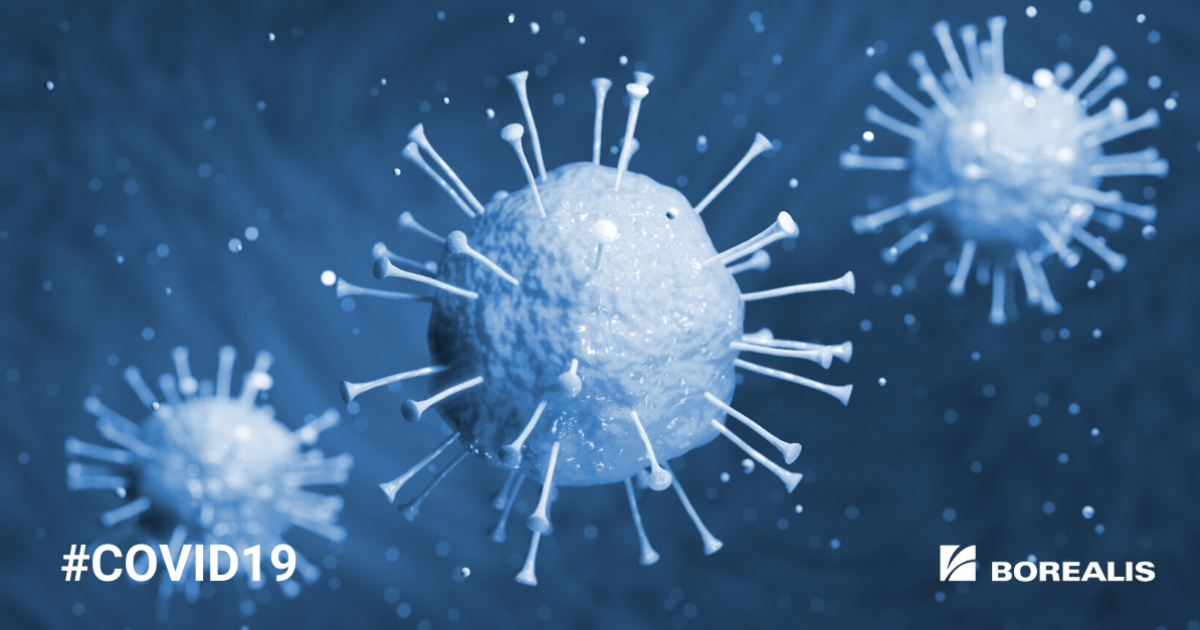

In [131]:
Image('Corona.png')

**Covid 19 Prediction Project**

**Importance of the Proposal in Today's World:**

The proposal is crucial in today's world due to the ongoing COVID-19 pandemic and the global need for accurate disease prediction. By accurately predicting diseases like COVID-19, we can identify individuals at high risk, allocate resources efficiently, and take proactive measures to mitigate the impact of the disease. Accurate disease prediction improves medical treatment by enabling early intervention, personalized medicine, and targeted preventive measures. It helps healthcare professionals make informed decisions, optimize resource allocation, and improve patient outcomes.

**Impact on the Medical Field:**

The proposed disease prediction model will have a significant impact on the medical field in terms of effective screening and reducing the healthcare burden. Accurate prediction allows for early identification of high-risk individuals, enabling timely interventions such as targeted testing, quarantine measures, and appropriate treatment plans. This proactive approach minimizes the spread of diseases, reduces hospitalization rates, and improves resource management. By prioritizing resources towards high-risk individuals, the medical field can optimize healthcare services, reduce costs, and provide better care to those who need it the most.

**Gap in Knowledge and Future Applications:**

One potential gap in knowledge is the limited understanding of the long-term effects of COVID-19 and its potential to manifest in various forms. The proposed method can help bridge this gap by continuously analyzing new data and incorporating emerging risk factors into the prediction models. This adaptive approach can provide insights into the long-term health consequences of COVID-19 and inform future research on post-recovery care.

Additionally, the proposed method can serve as a foundation for disease prediction in other contexts and future outbreaks. By applying similar approaches to different diseases, we can develop accurate prediction models and improve medical treatment across various healthcare scenarios. The knowledge gained from COVID-19 prediction can be transferable to other infectious diseases, chronic conditions, or public health challenges, enabling proactive strategies and better healthcare decision-making.

**2.Initial Hypothesis**

Dataset contains variables such as Test_date, Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache, Corona, Age_60_above, Sex, and Known_contact.



If we are following the DA track, our aim is to identify patterns in the data and important features that may impact a machine learning (ML) model. Here is a proposed approach to achieve this:

**Data Exploration:**
Perform exploratory data analysis (EDA) techniques to gain a better understanding of the dataset. This may include visualizations, summary statistics, and distribution analysis. Explore the variables related to COVID-19 outcomes, such as disease severity, hospitalization, or mortality rates.

**Correlation Analysis:**
Analyze the correlation between different features and COVID-19 outcomes. Use correlation matrices, scatter plots, or heatmaps to identify variables that have a strong relationship with the target variable. Look for both positive and negative correlations.

**3. Data Analysis**

**3.1 Importing the Modules**

In [1]:
import numpy as np
import pandas as pd

#visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore") # ignoring wranings

**3.2 Reading the Dataset**

In [2]:
#reading the dataset
covid_tested_raw = pd.read_csv("corona_tested_006.csv")
covid_tested = covid_tested_raw.copy() #creating a copy of dataset

In [3]:
#getting shape of dataset provided
covid_tested.shape

(278848, 11)

Here , we have 2,78,848 observations and 11 variables.

**3.3 Checking First 5 and last 5 rows of DataSet**

In [4]:
covid_tested.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,progress
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [5]:
covid_tested.tail()


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,progress
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


We can't see null values in data , but there are records with value as None in Age and Sex column.

**3.4 Checking number of features and their Datatypes.**

In [6]:
covid_tested.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  progress             278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


**Observations**

We have all the columns of Object Datatype , except Ind_ID column which is of integer datatype.
And , we have no null values in any column.

In [7]:
#getting statistical summary of data
covid_tested.describe(include = "all")

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,progress
count,278848.000000,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,NaN,51,5,5,5,5,5,3,3,3,3
top,NaN,20-04-2020,False,False,False,False,False,negative,None,female,Other
freq,NaN,10921,127531,137774,212584,212842,212326,260227,127320,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations**

we have unique values in various columns , we will address those in further data cleaning processes.

**3.5 Data Cleaning**

In [8]:
#checking for duplicates in data
covid_tested.duplicated().sum()

0

There are no duplicates in the dataset.

In [9]:
covid_tested.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'progress'],
      dtype='object')

**3.5.1 Dropping unwanted**

'Ind_ID' and 'Test_date' which we don't need in our analysis and in model building.
As per our business requirement , we have to divide the dataset in training set and Testing set based on Test_date , so we will keep this column now and drop it before model building and diving dataset into Training set and Test set.
Corona is our Outcome variable.
For now , we will drop 'Ind_ID' column.

In [10]:
#dropping 'Ind_ID' Column.
covid_tested = covid_tested.drop(['Ind_ID'] , axis = 1)

In [11]:
covid_tested.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,progress
0,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [12]:
#checking for null values
covid_tested.isnull()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,progress
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
278843,False,False,False,False,False,False,False,False,False,False
278844,False,False,False,False,False,False,False,False,False,False
278845,False,False,False,False,False,False,False,False,False,False
278846,False,False,False,False,False,False,False,False,False,False


In [13]:
#getting total number of null values.
covid_tested.isnull().sum()

Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
progress               0
dtype: int64

**We have no null values in dataset**

In [14]:
covid_tested.nunique()

Test_date              51
Cough_symptoms          5
Fever                   5
Sore_throat             5
Shortness_of_breath     5
Headache                5
Corona                  3
Age_60_above            3
Sex                     3
progress                3
dtype: int64

In [15]:
#viewing the unique values in each variables
pd.Series({c: covid_tested[c].unique() for c in covid_tested})

Test_date              [11-03-2020, 12-03-2020, 13-03-2020, 14-03-202...
Cough_symptoms                          [TRUE, FALSE, None, False, True]
Fever                                   [FALSE, TRUE, None, False, True]
Sore_throat                             [TRUE, FALSE, None, False, True]
Shortness_of_breath                     [FALSE, TRUE, None, False, True]
Headache                                [FALSE, TRUE, None, False, True]
Corona                                       [negative, positive, other]
Age_60_above                                             [None, No, Yes]
Sex                                                 [None, male, female]
progress                         [Abroad, Contact with confirmed, Other]
dtype: object

**Observations** : We can see repetition of data in Uppercase and Lowercase in all symptoms columns.Let's check this out in number of values

In [16]:
for c in covid_tested.columns:
    print("---- %s ---" % c)
    print(covid_tested[c].value_counts())

---- Test_date ---
20-04-2020    10921
19-04-2020    10199
22-04-2020     9646
21-04-2020     9624
16-04-2020     9138
23-04-2020     8744
01-04-2020     8654
13-04-2020     8425
02-04-2020     8188
03-04-2020     8079
17-04-2020     7645
05-04-2020     7509
30-04-2020     7313
27-04-2020     7304
15-04-2020     7149
31-03-2020     7134
24-04-2020     7028
26-03-2020     6663
14-04-2020     6571
28-04-2020     6334
18-04-2020     6321
26-04-2020     6131
12-04-2020     5984
27-03-2020     5963
07-04-2020     5931
30-03-2020     5915
10-04-2020     5678
28-03-2020     5602
25-03-2020     5495
06-04-2020     5368
29-03-2020     5277
04-04-2020     5145
25-04-2020     5052
24-03-2020     4735
09-04-2020     4539
11-04-2020     4341
29-04-2020     4259
08-04-2020     4058
22-03-2020     3565
23-03-2020     3494
19-03-2020     2243
18-03-2020     1991
20-03-2020     1870
21-03-2020     1648
17-03-2020     1463
16-03-2020     1304
15-03-2020      985
13-03-2020      686
12-03-2020      634
1

**Observations**

In the columns Cough_symptoms , Fever , Sore_throat , Shortness_of_breath and Headache. We have values like TRUE ,True , False , FALSE. So , we need to address these as we have to rename and make it to True and False only.
We also have another value of "None" in various columns like in Sex , age_60_above , Headache , Shortness_of_breath ,Fever and Cough_symptoms. So , we need to address those also.
As these values are null values , but not recognised as Null value.
Let's clean each column separately

**3.5.2 Cough Symptoms Column**

In [121]:
covid_tested['Cough_symptoms'].value_counts()

False    233133
True      41571
Name: Cough_symptoms, dtype: int64

In [17]:
covid_tested['Cough_symptoms'] = covid_tested['Cough_symptoms'].apply(lambda x : False if x == 'FALSE' else x)
covid_tested['Cough_symptoms'] = covid_tested['Cough_symptoms'].apply(lambda x : True if x == 'TRUE' else x)
covid_tested['Cough_symptoms'].value_counts()

False    236368
True      42228
None        252
Name: Cough_symptoms, dtype: int64

We have value as "None" in 252 records , we need to impute these values or drop it. As this contain categorical values , we can't use mean imputation or KNN imputation. Imputing it with Mode(which is False) might make our data bias.

That's why I will prefer to drop these records.
Before that I want to check relation between "Cough_symptoms" column and "Corona" column. We have a label column named "Corona" , we also have value as "Other" in that column. So , let's check if there is a relation between "other"value of corona column and in "None" value of Cough_symptoms and "Fever" Column.

In [18]:
covid_tested[covid_tested["Cough_symptoms"] == "None"]

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,progress
68,11-03-2020,None,FALSE,TRUE,FALSE,FALSE,positive,None,None,Abroad
281,11-03-2020,None,None,FALSE,FALSE,FALSE,positive,None,None,Abroad
577,12-03-2020,None,None,None,None,None,positive,None,None,Other
2664,15-03-2020,None,None,FALSE,FALSE,FALSE,negative,None,None,Other
4442,16-03-2020,None,None,FALSE,FALSE,FALSE,negative,None,None,Other
...,...,...,...,...,...,...,...,...,...,...
95936,04-04-2020,None,None,False,False,False,negative,No,male,Other
95937,04-04-2020,None,None,False,False,False,negative,No,female,Other
95938,04-04-2020,None,None,False,False,False,negative,Yes,male,Other
95939,04-04-2020,None,None,False,False,False,negative,No,female,Other


I thought there might be relation between "None" value from "Cough_symptoms" column and "other" value of "Corona" column. But , I don't see any relation between them

**Dropping rows with "None" value in "Cough_symptoms" column.**

In [19]:
covid_tested = covid_tested[covid_tested.Cough_symptoms != "None"]


In [20]:
covid_tested


,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,progress
0,11-03-2020,True,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,11-03-2020,False,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,11-03-2020,False,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,11-03-2020,True,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,11-03-2020,True,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,30-04-2020,False,False,False,False,False,negative,None,male,Other


In [21]:
covid_tested['Cough_symptoms'].unique()


array([True, False], dtype=object)

**3.5.3 Fever Column**

In [22]:
covid_tested['Fever'].value_counts()


False    137774
FALSE    119069
TRUE      11749
True      10002
None          2
Name: Fever, dtype: int64

In [23]:
covid_tested['Fever'] = covid_tested['Fever'].apply(lambda x : False if x == 'FALSE' else x)
covid_tested['Fever'] = covid_tested['Fever'].apply(lambda x : True if x == 'TRUE' else x)
covid_tested['Fever'].value_counts()

False    256843
True      21751
None          2
Name: Fever, dtype: int64

**Imputation of "None" value**

We had "None" value in 252 records previously but after dropping 252 rows of containing "None" value in Cough_symptoms column ,we are now left with 2 rows with "None" value in Fever column.
as this is categorical column , we can impute this value with mode.
We have 256843 records with False value and only 21751 records with True value , there is a high probabolity that the record to be False.
There is a lot of difference between the number of records between True and False , so it will not create bias in result.

In [24]:
covid_tested['Fever'].mode()

0    False
Name: Fever, dtype: object

In [25]:
covid_tested['Fever'] = covid_tested['Fever'].apply(lambda x : False if x == 'None' else x)
covid_tested['Fever'].value_counts()

False    256845
True      21751
Name: Fever, dtype: int64

**3.5.4 Sore throat Column**

In [26]:
covid_tested['Sore_throat'].value_counts()


False    212358
FALSE     64316
TRUE       1194
True        728
Name: Sore_throat, dtype: int64

In [27]:
covid_tested['Sore_throat'] = covid_tested['Sore_throat'].apply(lambda x : False if x == 'FALSE' else x)
covid_tested['Sore_throat'] = covid_tested['Sore_throat'].apply(lambda x : True if x == 'TRUE' else x)
covid_tested['Sore_throat'].value_counts()

False    276674
True       1922
Name: Sore_throat, dtype: int64

**3.5.5 Shortness of Breath Column**

In [28]:
covid_tested['Shortness_of_breath'].value_counts()


False    212616
FALSE     64406
TRUE       1104
True        470
Name: Shortness_of_breath, dtype: int64

In [29]:
covid_tested['Shortness_of_breath'] = covid_tested['Shortness_of_breath'].apply(lambda x : False if x == 'FALSE' else x)
covid_tested['Shortness_of_breath'] = covid_tested['Shortness_of_breath'].apply(lambda x : True if x == 'TRUE' else x)
covid_tested['Shortness_of_breath'].value_counts()

False    277022
True       1574
Name: Shortness_of_breath, dtype: int64

**3.5.6 Headache Column**

In [30]:
covid_tested['Headache'].value_counts()

False    212100
FALSE     64086
TRUE       1424
True        986
Name: Headache, dtype: int64

In [31]:
covid_tested['Headache'] = covid_tested['Headache'].apply(lambda x : False if x == 'FALSE' else x)
covid_tested['Headache'] = covid_tested['Headache'].apply(lambda x : True if x == 'TRUE' else x)
covid_tested['Headache'].value_counts()

False    276186
True       2410
Name: Headache, dtype: int64

In [32]:
covid_tested.describe(include = 'all')


,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,progress
count,278596,278596,278596,278596,278596,278596,278596,278596,278596,278596
unique,51,2,2,2,2,2,3,3,3,3
top,20-04-2020,False,False,False,False,False,negative,None,female,Other
freq,10921,236368,256845,276674,277022,276186,260008,127315,130031,242506


**3.5.7 Age_60_above Column**

In [33]:
covid_tested["Age_60_above"].value_counts()

None    127315
No      125506
Yes      25775
Name: Age_60_above, dtype: int64

**Observations :**

we have a lot of values with value as "None".
There might be the reason behind "None" value , when patient's age is unknown or patient may not be comfortale with telling his age.
we can rename the value of "None" as "Unknown" .

In [34]:
#renaming "None" value to "Unknown".
covid_tested['Age_60_above'] = covid_tested['Age_60_above'].apply(lambda x : "Unknown" if x == 'None' else x)
covid_tested['Age_60_above'].value_counts()

Unknown    127315
No         125506
Yes         25775
Name: Age_60_above, dtype: int64

**3.5.8 Sex Column.**

In [35]:
covid_tested['Sex'].value_counts()


female    130031
male      129013
None       19552
Name: Sex, dtype: int64

**Observations :**

we have a lot of values with value as "None".
There might be the reason behind "None" value , when patient's sex is unknown.
we can rename the value of "None" as "Unknown" .

In [36]:
#renaming "None" value to "Unknown".
covid_tested['Sex'] = covid_tested['Sex'].apply(lambda x : "Unknown" if x == 'None' else x)
covid_tested['Sex'].value_counts()

female     130031
male       129013
Unknown     19552
Name: Sex, dtype: int64

**3.5.9 Progress Column**

In [37]:
covid_tested["progress"].value_counts()

Other                     242506
Abroad                     25462
Contact with confirmed     10628
Name: progress, dtype: int64

**3.5.10 corona Column(Outcome Variable)**

In [38]:
covid_tested['Corona'].value_counts()

negative    260008
positive     14696
other         3892
Name: Corona, dtype: int64

**Observations :**

We have three values in our outcome variable. positive , negative and other.
As per our business requirement , we need to build a model which can predict whether a person is covid positive or negative.
So , we don't need to train our model for "other" value.
And , we have less than 1% of total records as "other" value.
So , we can drop it.

In [39]:
covid_tested = covid_tested[covid_tested.Corona != "other"]
covid_tested

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,progress
0,11-03-2020,True,False,True,False,False,negative,Unknown,Unknown,Abroad
1,11-03-2020,False,True,False,False,False,positive,Unknown,Unknown,Abroad
2,11-03-2020,False,True,False,False,False,positive,Unknown,Unknown,Abroad
3,11-03-2020,True,False,False,False,False,negative,Unknown,Unknown,Abroad
4,11-03-2020,True,False,False,False,False,negative,Unknown,Unknown,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,30-04-2020,False,False,False,False,False,positive,Unknown,male,Other
278844,30-04-2020,False,False,False,False,False,negative,Unknown,female,Other
278845,30-04-2020,False,False,False,False,False,negative,Unknown,male,Other
278846,30-04-2020,False,False,False,False,False,negative,Unknown,male,Other


In [40]:
covid_tested['Corona'].value_counts()


negative    260008
positive     14696
Name: Corona, dtype: int64

**Observations :**

After Data cleaning , we are now left with 274704 records

**3.5.11 Saving the cleaned dataset**

In [41]:
# covid_tested.to_csv("covid_cleaned.csv")

**3.6 Exploratory Data Analysis**

**3.6.1 Checking for Data Imbalance**

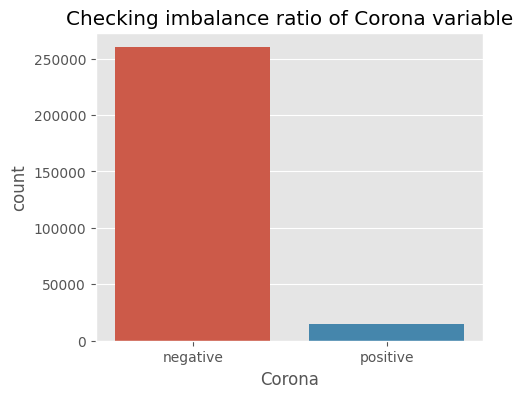

In [42]:
# checking the imbalance using countplot
plt.style.use('ggplot')
plt.figure(figsize = [5,4])

sns.countplot(data=covid_tested, x='Corona')
plt.title("Checking imbalance ratio of Corona variable")
plt.show()


In [43]:
# checking exact Corona Positive to Corona negative ratio
covid_tested[covid_tested.Corona=='negative'].shape[0]/covid_tested[covid_tested.Corona=='positive'].shape[0]

17.692433315187806

**Observations : 1 in every 17 patients is Corona Positive.**

In [44]:
# inspecting Corona column
print(covid_tested['Corona'].value_counts())
print()
print(covid_tested['Corona'].value_counts(normalize=True))

negative    260008
positive     14696
Name: Corona, dtype: int64

negative    0.946502
positive    0.053498
Name: Corona, dtype: float64


**Observations :**

94.65% of the patients are Covid Negative.
5.35% Patients are Covid positive.
Our data is highly imbalance

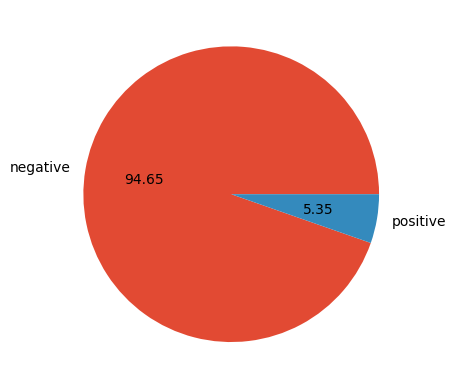

In [45]:
plt.pie(covid_tested['Corona'].value_counts(),labels = ['negative','positive'],autopct = "%0.2f")
plt.show()


**Encoding Outcome Variable(Corona)**

In [46]:
#Encoding Corona column
covid_tested['Corona'] = covid_tested['Corona'].map({'negative' : 0 , 'positive' : 1})

**Creating new dataframe with Corona value**

In [47]:
# creating new dataframe with Corona value
df_positive = covid_tested[covid_tested['Corona'] == 1]
df_negative = covid_tested[covid_tested['Corona'] == 0]

**Univariate Analysis**

In [48]:
covid_tested.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 274704 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Test_date            274704 non-null  object
 1   Cough_symptoms       274704 non-null  object
 2   Fever                274704 non-null  bool  
 3   Sore_throat          274704 non-null  bool  
 4   Shortness_of_breath  274704 non-null  bool  
 5   Headache             274704 non-null  bool  
 6   Corona               274704 non-null  int64 
 7   Age_60_above         274704 non-null  object
 8   Sex                  274704 non-null  object
 9   progress             274704 non-null  object
dtypes: bool(4), int64(1), object(5)
memory usage: 15.7+ MB


In [49]:
# checking all columns with object type data other than "Corona" Column and storing it in a list
obj_plot=list(covid_tested.columns[(covid_tested.dtypes=="object") | (covid_tested.dtypes=="bool")])
obj_plot

['Test_date',
 'Cough_symptoms',
 'Fever',
 'Sore_throat',
 'Shortness_of_breath',
 'Headache',
 'Age_60_above',
 'Sex',
 'progress']

In [50]:
# checking each columns underlying groups
for i in obj_plot:
    # for patients with Corona positive
    print("--------------------------------------------------")
    print(f"{i} for patients with Corona positive")
    print(df_positive[i].value_counts().sort_values(ascending = False))
    # for patients with Corona negative
    print(f"\n{i} for patients with Corona negative")
    print(df_negative[i].value_counts().sort_values(ascending = False))

--------------------------------------------------
Test_date for patients with Corona positive
31-03-2020    729
01-04-2020    681
02-04-2020    615
30-03-2020    611
26-03-2020    542
27-03-2020    516
05-04-2020    505
03-04-2020    504
25-03-2020    486
07-04-2020    483
04-04-2020    441
28-03-2020    439
13-04-2020    431
29-03-2020    428
06-04-2020    394
23-03-2020    388
24-03-2020    377
10-04-2020    356
14-04-2020    354
12-04-2020    290
11-04-2020    290
09-04-2020    288
19-04-2020    279
08-04-2020    274
22-03-2020    271
15-04-2020    259
23-04-2020    256
18-04-2020    237
21-04-2020    233
16-04-2020    233
20-04-2020    225
17-04-2020    207
22-04-2020    204
21-03-2020    192
20-03-2020    170
24-04-2020    169
19-03-2020    157
30-04-2020    153
18-03-2020    135
27-04-2020    129
28-04-2020    115
17-03-2020     92
26-04-2020     92
25-04-2020     91
16-03-2020     90
29-04-2020     75
15-03-2020     55
12-03-2020     39
13-03-2020     39
11-03-2020     39
14-03

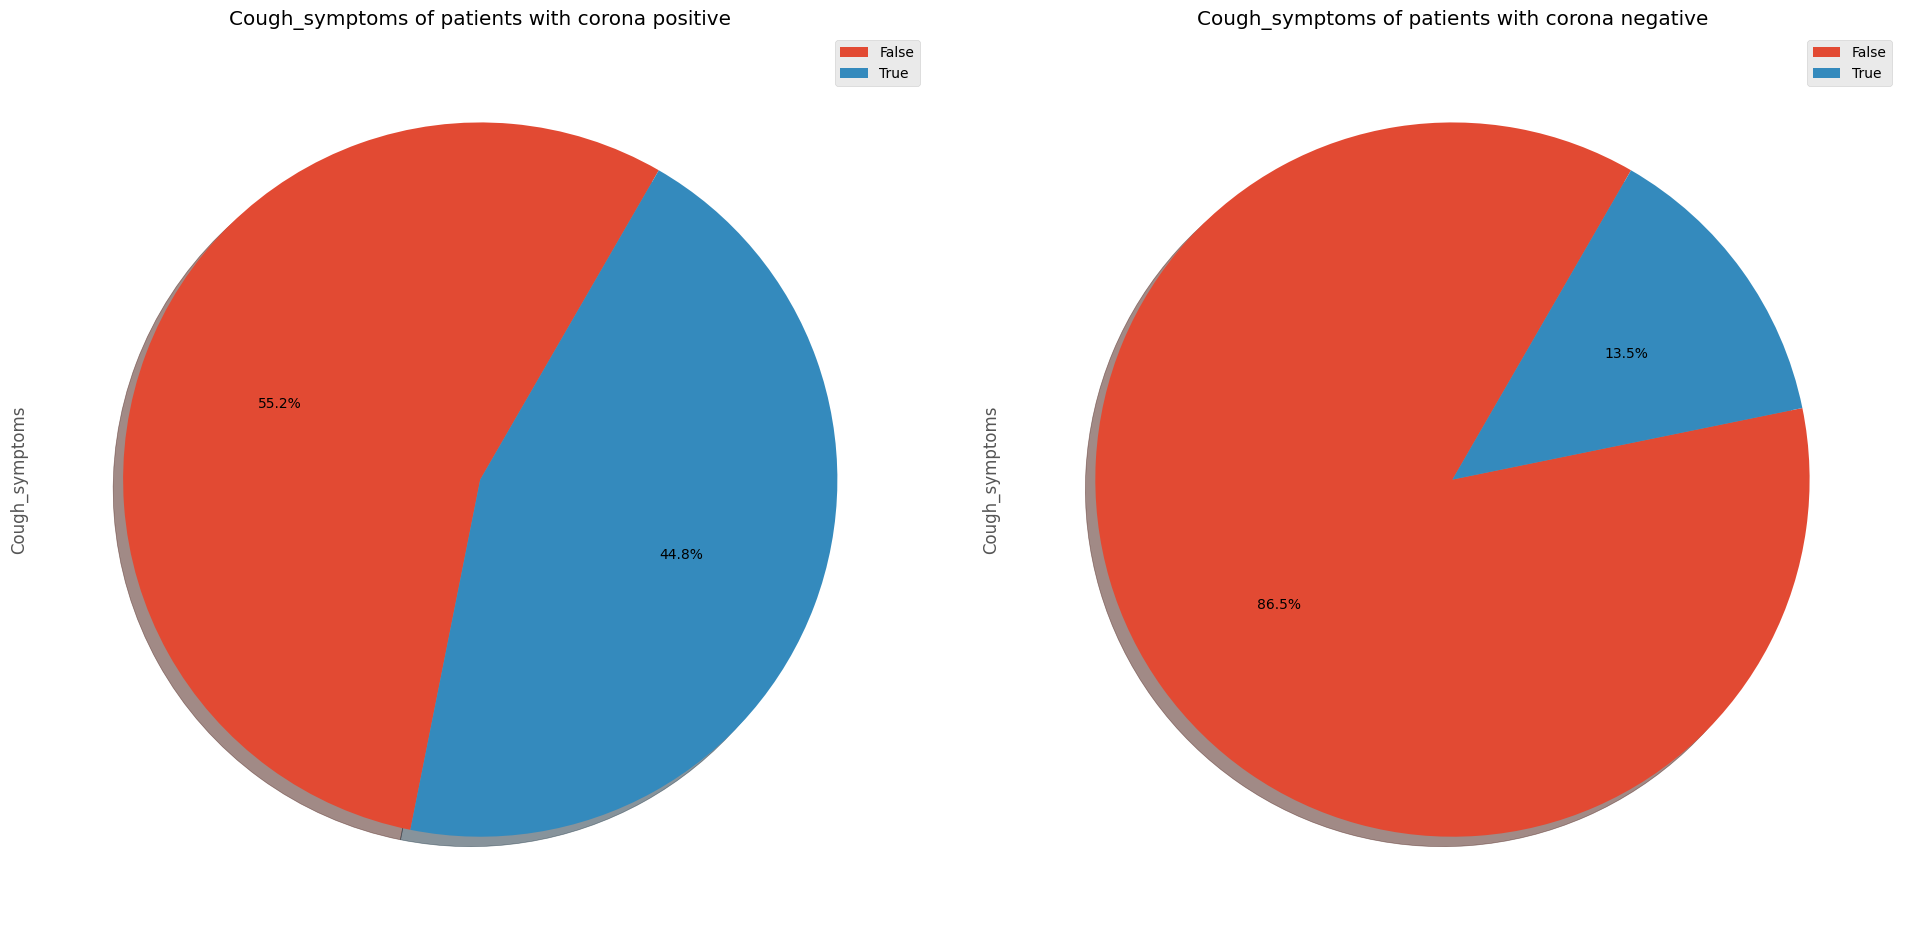

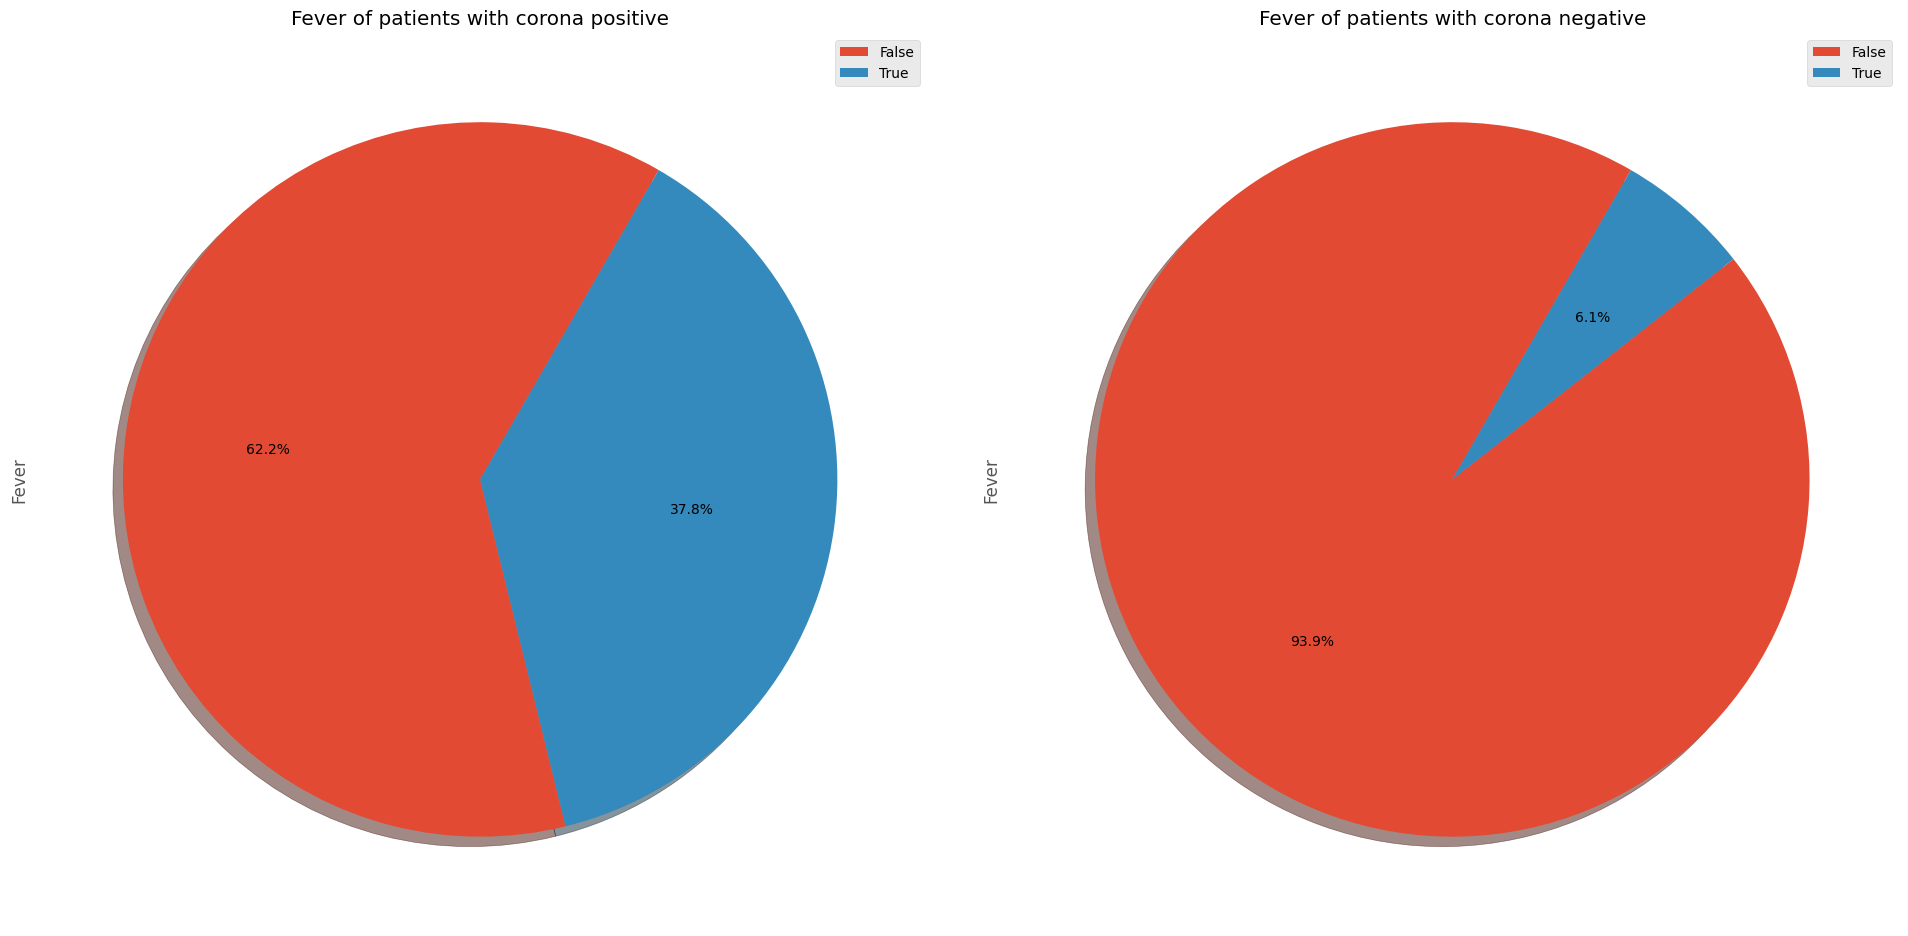

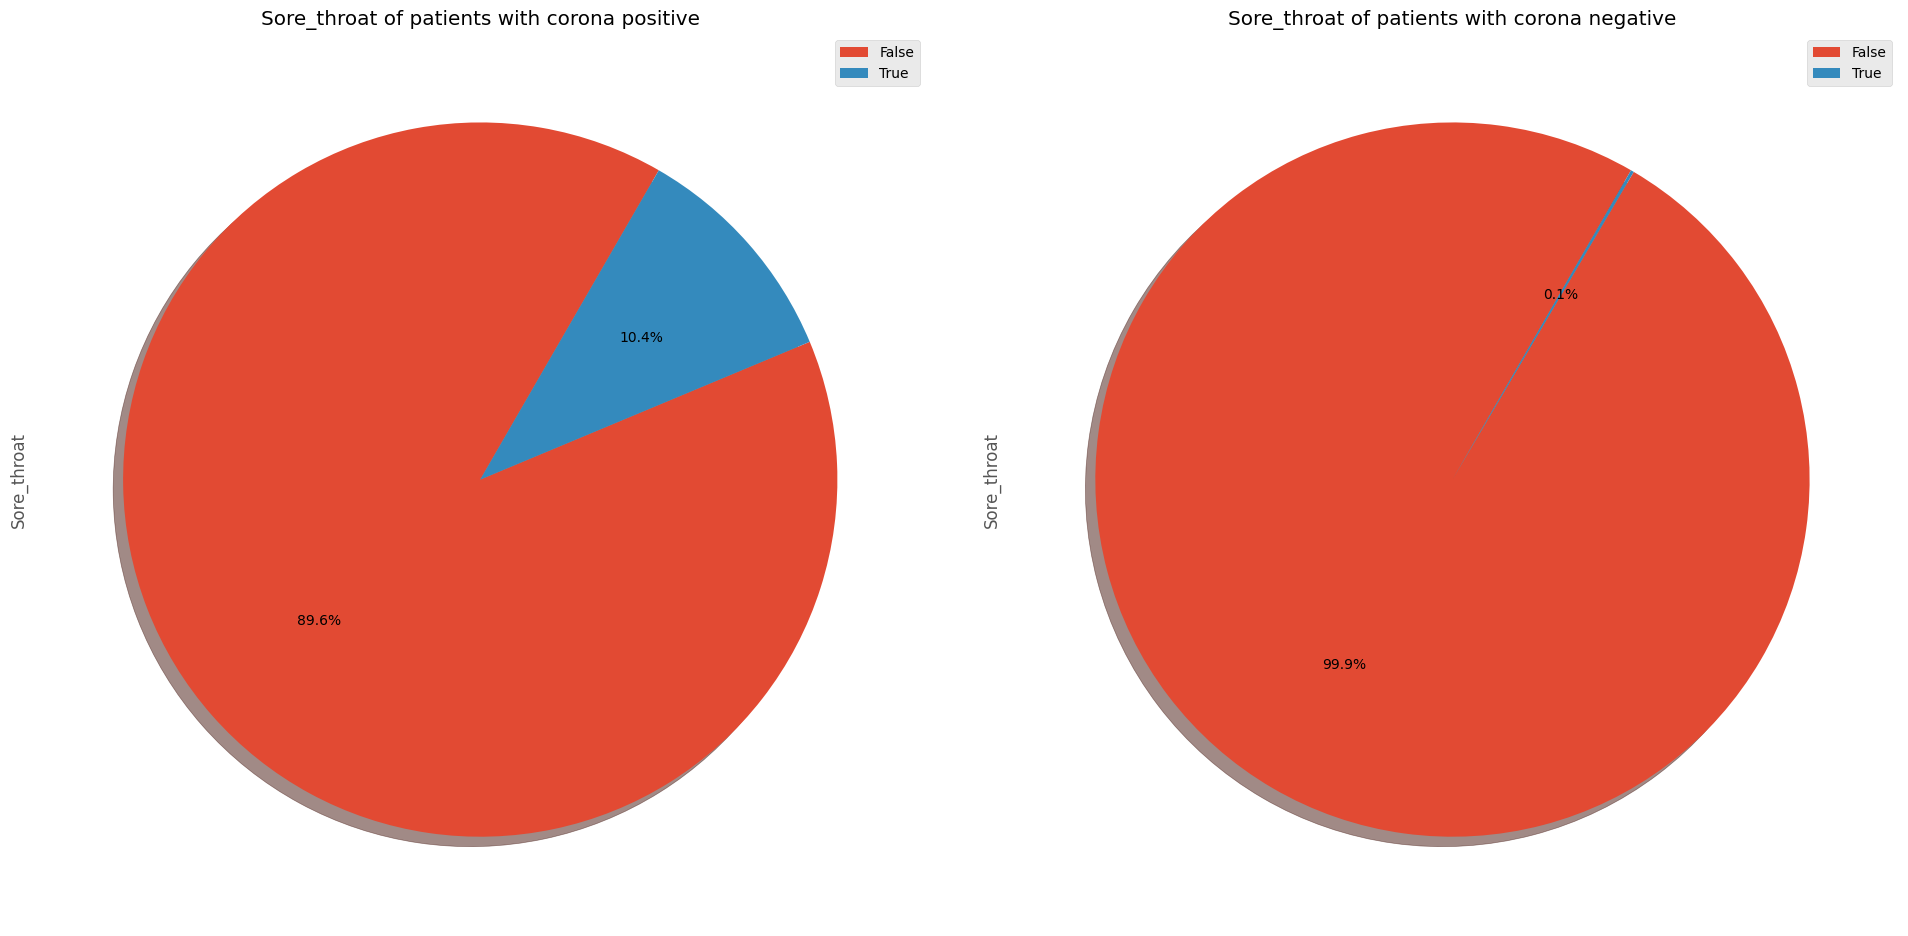

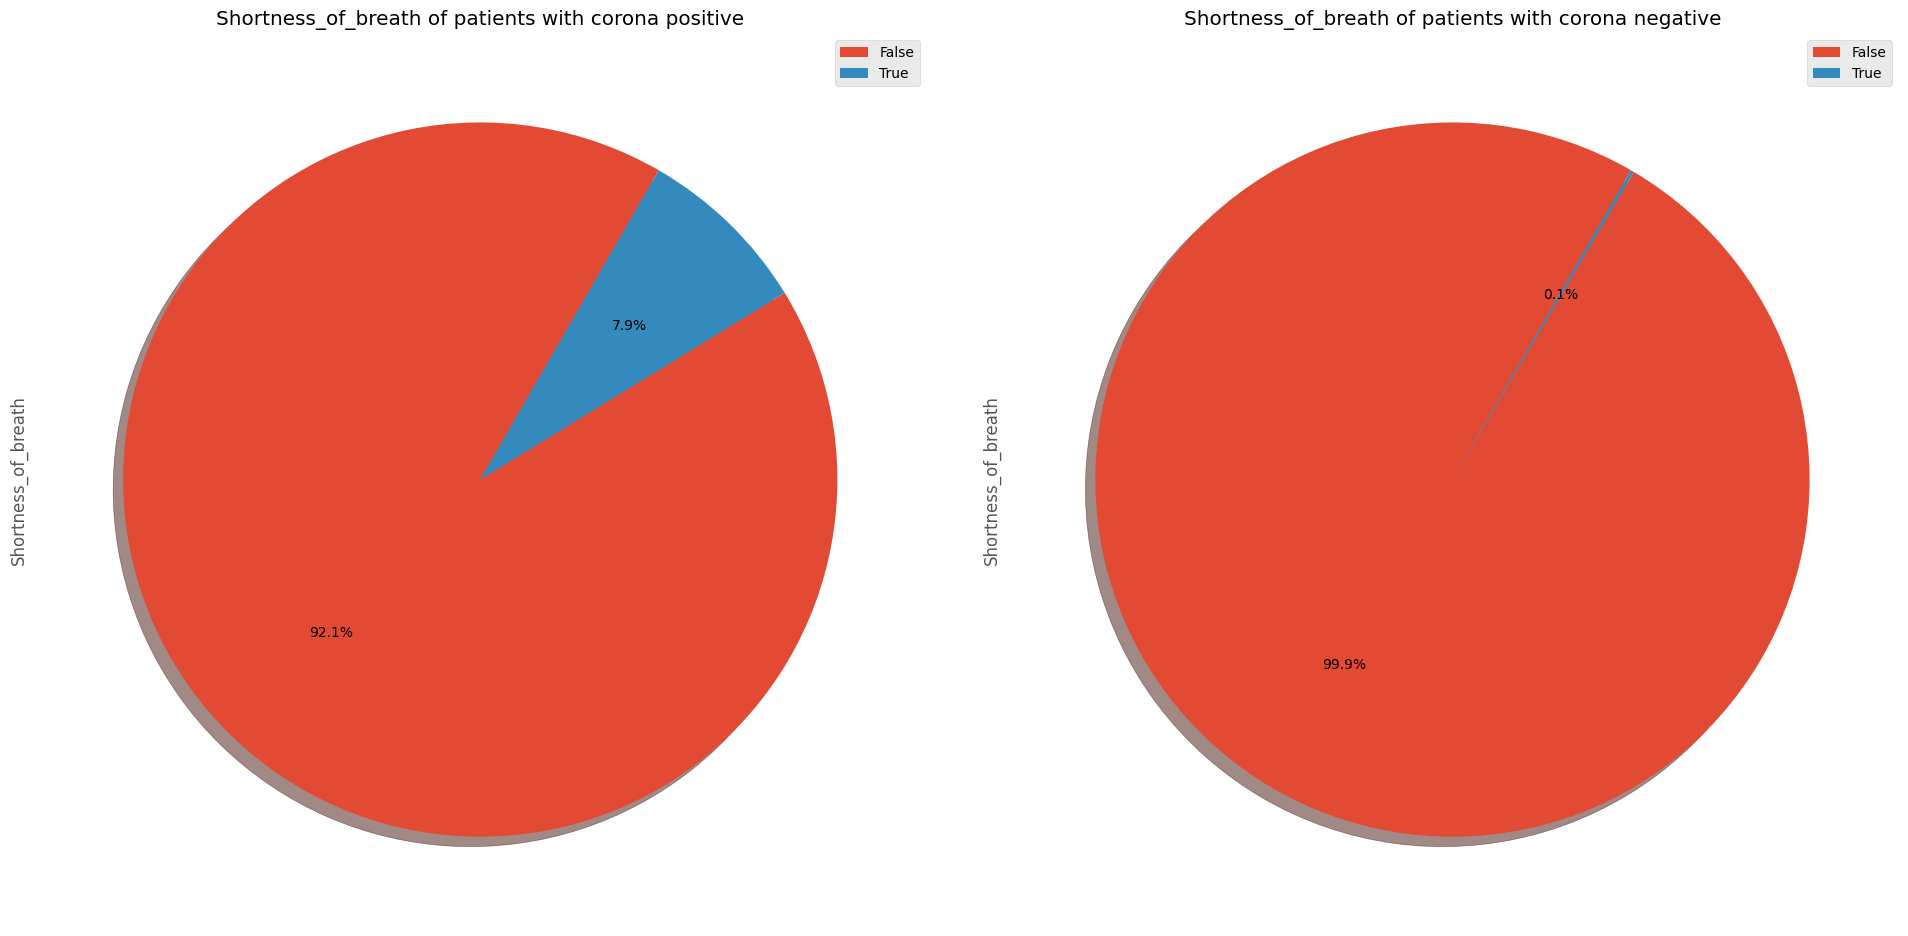

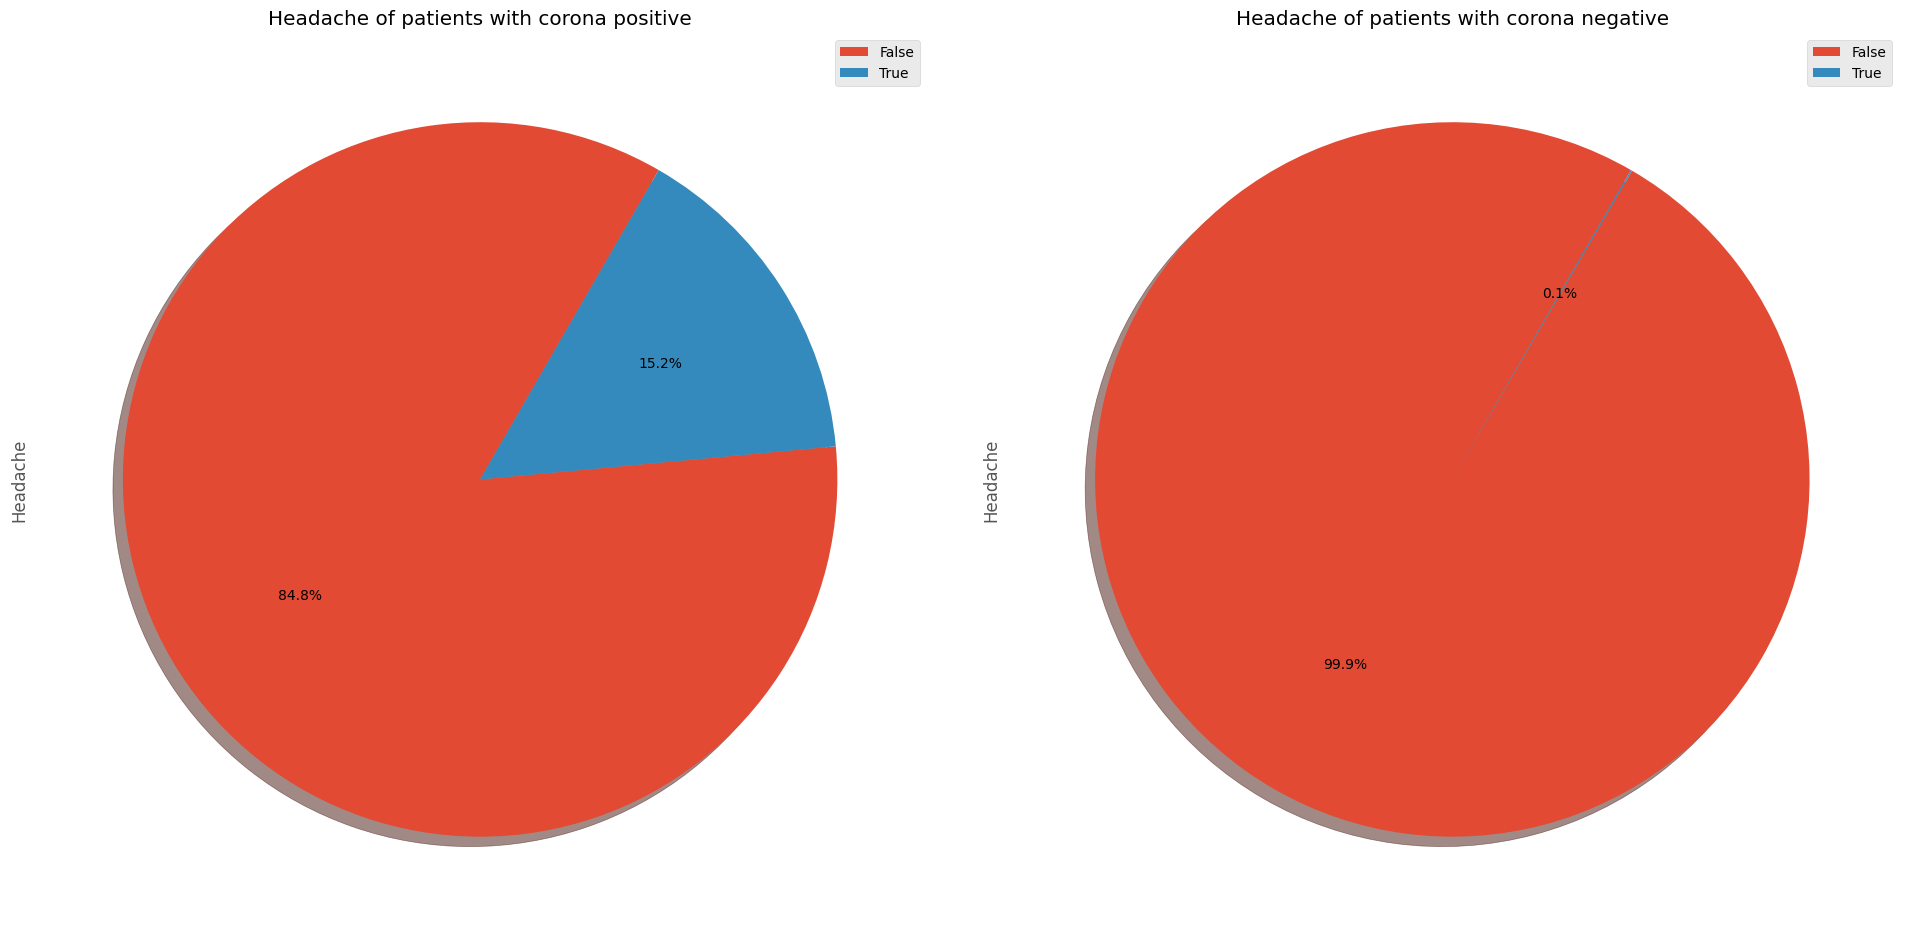

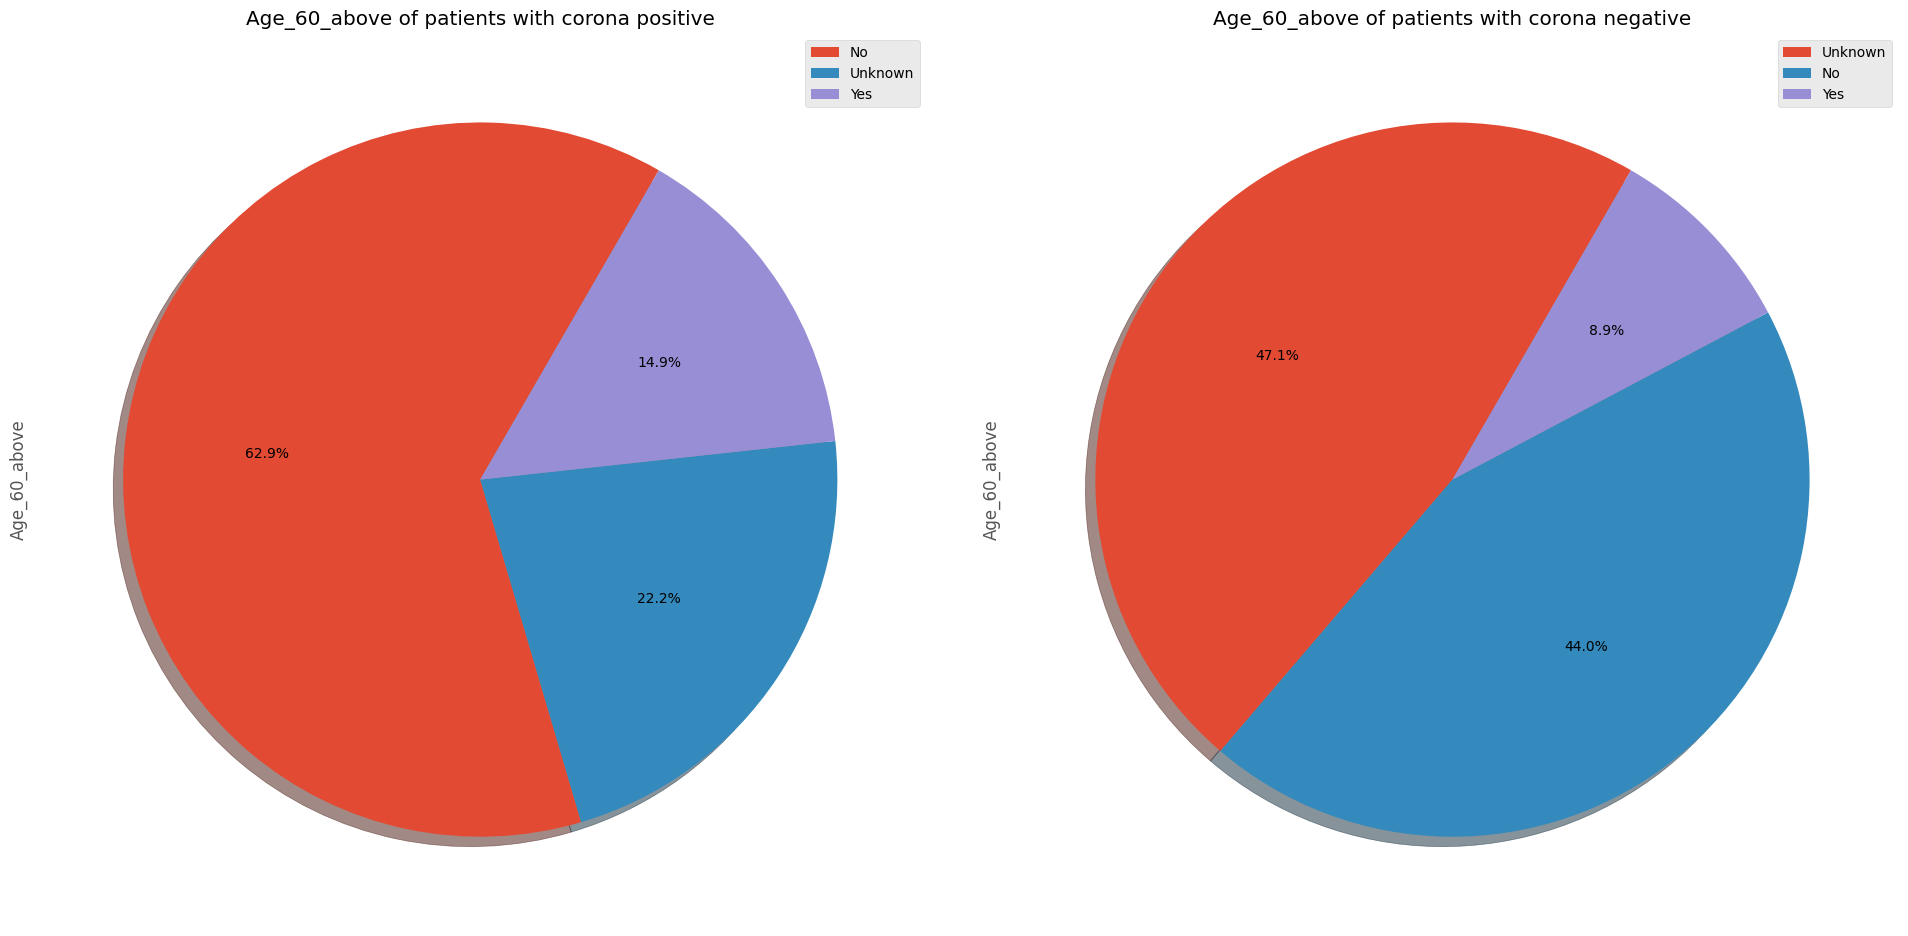

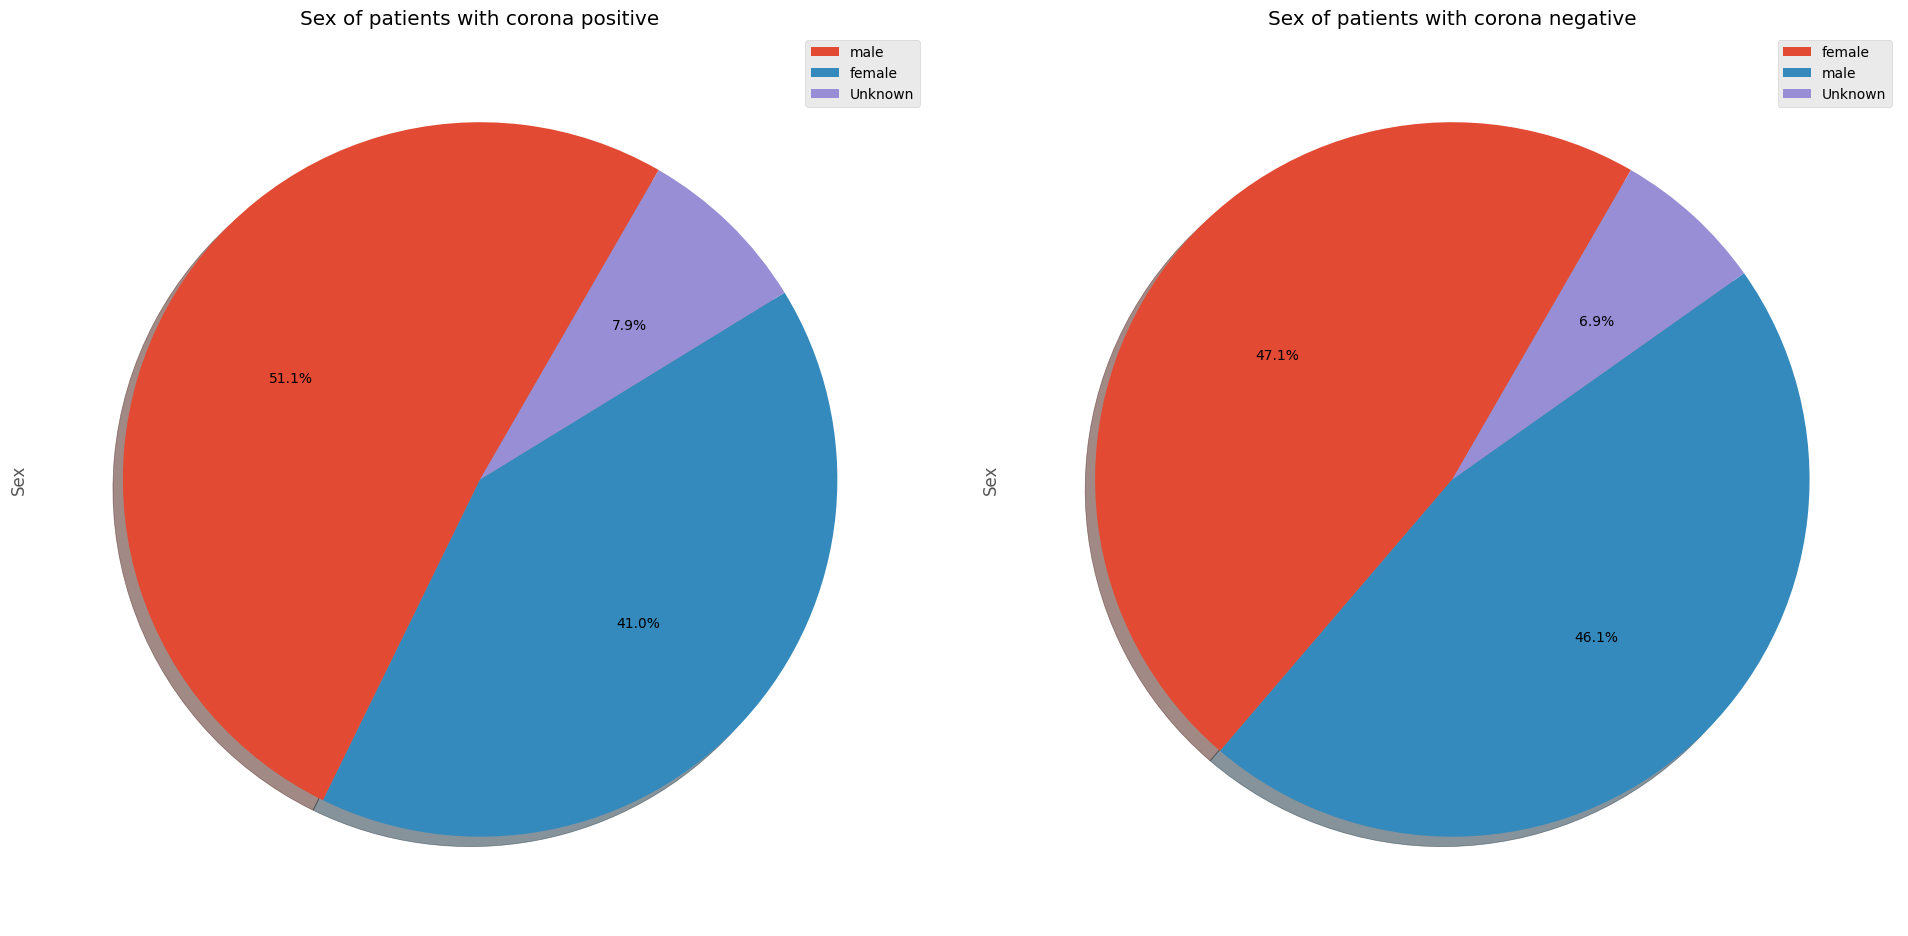

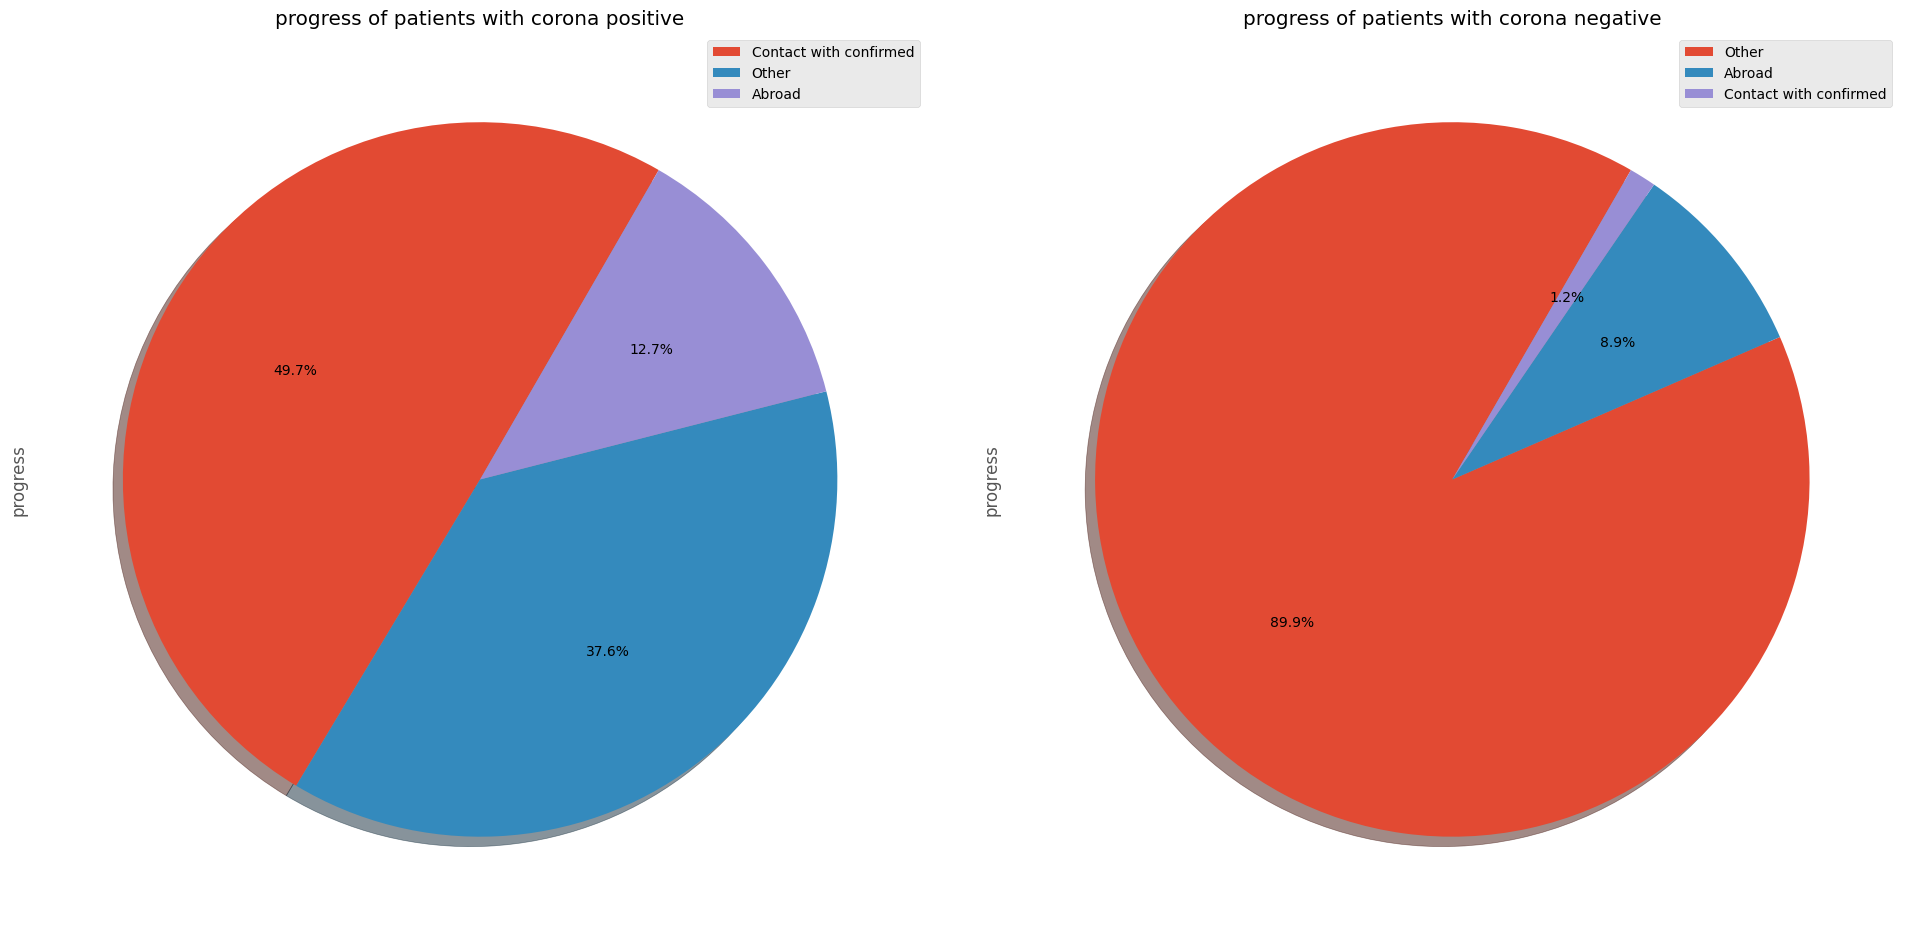

In [51]:
#plotting pie chart with symptoms and corona positive or negative
p_plot=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above','Sex','progress']
for i in p_plot:
    plt.style.use('ggplot')
    plt.figure(figsize = [20,12])
    # for patients with corona positive
    plt.subplot(1,2,1)
    plt.title(f'{i} of patients with corona positive')
    df_positive[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=60, labeldistance=None)
    plt.legend()
    # for patients with corona negative
    plt.subplot(1,2,2)
    plt.title(f'{i} of patients with corona negative')
    df_negative[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=60, labeldistance=None)
    plt.legend()
    plt.tight_layout(pad = 4)
    plt.show()

**Observations :**

Cough_Symptoms and Fever are the most common symptoms among Corona positive patients.

Almost 50% of Corona Positive patients have Known_Contact Abroad.

Among corona positive patients male are more than females.

Sore_throat, Shortness_of breath and Headache these symptoms are not in Corona negative patients.

Cough and Fever are the most common symptoms among COVID positive males whose known contact was abroad.

Headache, Shortness of Breath, Sore throat symptom was less common among COVID negative people.

In April we found most number of corona positive cases(8863), And in march 5863 corona positive cases.

There are 121 corona negative patients who have fever and Sore throat.

There are 1162 corona patients who faced shortness of breath.

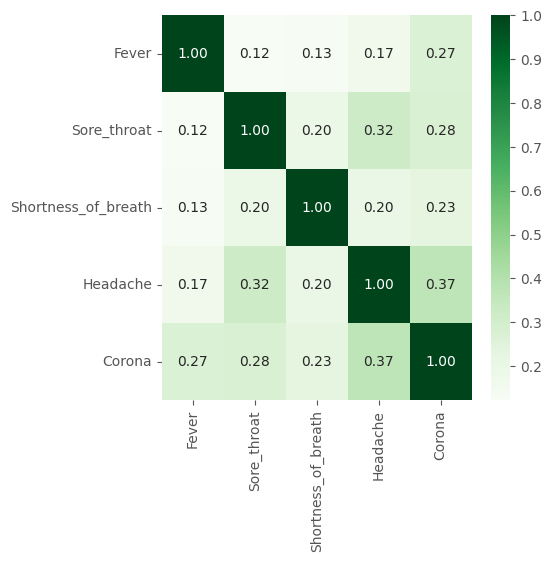

In [52]:
corr_df= covid_tested.corr()

plt.figure(figsize = (5,5))
sns.heatmap(data = corr_df, annot = True, cmap = "Greens", cbar = True, fmt='.2f')
plt.show()

In [53]:
covid_tested.corr()


,Fever,Sore_throat,Shortness_of_breath,Headache,Corona
Fever,1.000000,0.122233,0.125840,0.169681,0.266607
Sore_throat,0.122233,1.000000,0.195181,0.323201,0.278442
Shortness_of_breath,0.125840,0.195181,1.000000,0.201992,0.233399
Headache,0.169681,0.323201,0.201992,1.000000,0.367475
Corona,0.266607,0.278442,0.233399,0.367475,1.000000


**Observations :**

we can't see any two symptoms with high correlation.


**4.1 Feature Engineering**

It is the process of transforming the features that better represent the underlying problem to predictive models, resulting in improved model accuracy on unseen data.

It includes feature creation, Feature scaling,feature extraction and feature selection.

Here , we will convert categorical data into numerical data first.

In [54]:
covid_tested

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,progress
0,11-03-2020,True,False,True,False,False,0,Unknown,Unknown,Abroad
1,11-03-2020,False,True,False,False,False,1,Unknown,Unknown,Abroad
2,11-03-2020,False,True,False,False,False,1,Unknown,Unknown,Abroad
3,11-03-2020,True,False,False,False,False,0,Unknown,Unknown,Abroad
4,11-03-2020,True,False,False,False,False,0,Unknown,Unknown,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,30-04-2020,False,False,False,False,False,1,Unknown,male,Other
278844,30-04-2020,False,False,False,False,False,0,Unknown,female,Other
278845,30-04-2020,False,False,False,False,False,0,Unknown,male,Other
278846,30-04-2020,False,False,False,False,False,0,Unknown,male,Other


Here , we have all the columns in object and boolean datatype.
We need to convert all of them into numnerical for model building purposes as models understand only numerical values.
We also have Test_date column , we don't need this column now as we need to do Train/Test Split based on the date.
we will delete this column after we do Train/Test Split.
let's do encoding and convert remaining columns into numerical values.

In [55]:
covid_tested.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274704 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Test_date            274704 non-null  object
 1   Cough_symptoms       274704 non-null  object
 2   Fever                274704 non-null  bool  
 3   Sore_throat          274704 non-null  bool  
 4   Shortness_of_breath  274704 non-null  bool  
 5   Headache             274704 non-null  bool  
 6   Corona               274704 non-null  int64 
 7   Age_60_above         274704 non-null  object
 8   Sex                  274704 non-null  object
 9   progress             274704 non-null  object
dtypes: bool(4), int64(1), object(5)
memory usage: 15.7+ MB


In [56]:
#fetching unique values of features
print(covid_tested['Cough_symptoms'].unique())
print(covid_tested['Fever'].unique())
print(covid_tested['Sore_throat'].unique())
print(covid_tested['Shortness_of_breath'].unique())
print(covid_tested['Headache'].unique())
print(covid_tested['Age_60_above'].unique())
print(covid_tested['Sex'].unique())
print(covid_tested['progress'].unique())

[True False]
[False  True]
[ True False]
[False  True]
[False  True]
['Unknown' 'No' 'Yes']
['Unknown' 'male' 'female']
['Abroad' 'Contact with confirmed' 'Other']


**4.1.1 encoding Independent variable columns using Label Encoder**

In [57]:
from sklearn.preprocessing import LabelEncoder

#performing label encoding on Age_60_above, Sex , Known_contact columns
covid_tested[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above', 'Sex' , 'progress']]

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,progress
0,True,False,True,False,False,Unknown,Unknown,Abroad
1,False,True,False,False,False,Unknown,Unknown,Abroad
2,False,True,False,False,False,Unknown,Unknown,Abroad
3,True,False,False,False,False,Unknown,Unknown,Abroad
4,True,False,False,False,False,Unknown,Unknown,Contact with confirmed
...,...,...,...,...,...,...,...,...
278843,False,False,False,False,False,Unknown,male,Other
278844,False,False,False,False,False,Unknown,female,Other
278845,False,False,False,False,False,Unknown,male,Other
278846,False,False,False,False,False,Unknown,male,Other


In [58]:
# 'Cough_symptoms' (TRUE = 1 , FALSE = 0)
# 'FEVER' (TRUE = 1 , FALSE = 0)
# 'Sore_throat' (TRUE = 1 , FALSE = 0)
# 'Shortness_of_breath' (TRUE = 1 , FALSE = 0)
# 'Headache' (TRUE = 1 , FALSE = 0)
# Corona (Positive =1 , Negative = 0)
# Age_60_above (No=0 , Unknown = 1 , Yes = 2)
# Sex (Unknown=0, Female=1, Male=2)
# Known_contact (Abroad=0, Contact with confirmed = 1, other = 2)

In [59]:
covid_tested


,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,progress
0,11-03-2020,True,False,True,False,False,0,Unknown,Unknown,Abroad
1,11-03-2020,False,True,False,False,False,1,Unknown,Unknown,Abroad
2,11-03-2020,False,True,False,False,False,1,Unknown,Unknown,Abroad
3,11-03-2020,True,False,False,False,False,0,Unknown,Unknown,Abroad
4,11-03-2020,True,False,False,False,False,0,Unknown,Unknown,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,30-04-2020,False,False,False,False,False,1,Unknown,male,Other
278844,30-04-2020,False,False,False,False,False,0,Unknown,female,Other
278845,30-04-2020,False,False,False,False,False,0,Unknown,male,Other
278846,30-04-2020,False,False,False,False,False,0,Unknown,male,Other


In [60]:
# covid_tested.to_csv("cleaned.csv")


In [61]:
X = covid_tested.drop(columns = ['Test_date','Corona'],axis = 1)
y = covid_tested['Corona']



```
`# This is formatted as code`
```

**4.1.2 Examining Multicollinearity using VIF**

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = covid_tested[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex']]

# Handle missing values
data = data.dropna()  # Remove rows with missing values or use imputation techniques

# Check if all columns are numeric
numeric_cols = data.select_dtypes(include=np.number).columns
data = data[numeric_cols]  # Keep only numeric columns

# Check for infinite or non-finite values
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]

print(vif_data)


Empty DataFrame
Columns: [Feature, VIF]
Index: []


**4.2 Train/Test Split based on date**

As per our business requirement we have to take data from 11th March 2020 to 15th April 2020 as Training Set & Validation Set.

And , data from 16th April to 30th april as Test Set.

In [64]:
#changing the datatype of Test_date from object to Datetime
covid_tested['Test_date'] = pd.to_datetime(covid_tested["Test_date"] , format = '%d-%m-%Y')

In [65]:
covid_tested.head()


,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,progress
0,2020-03-11,True,False,True,False,False,0,Unknown,Unknown,Abroad
1,2020-03-11,False,True,False,False,False,1,Unknown,Unknown,Abroad
2,2020-03-11,False,True,False,False,False,1,Unknown,Unknown,Abroad
3,2020-03-11,True,False,False,False,False,0,Unknown,Unknown,Abroad
4,2020-03-11,True,False,False,False,False,0,Unknown,Unknown,Contact with confirmed


In [66]:
#As per our business requirement we have to take data from 11th March 2020 to 15th April 2020 as Training Set & Validation.
#And , data from 16th April to 30th april as Test Set.
break_date = pd.Timestamp("2020-04-15")
df_train_valid = covid_tested[covid_tested["Test_date"] <= break_date]
df_test = covid_tested[covid_tested["Test_date"] > break_date]

In [67]:
#data from 11th march 2020 to 15th april 2020
df_train_valid

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,progress
0,2020-03-11,True,False,True,False,False,0,Unknown,Unknown,Abroad
1,2020-03-11,False,True,False,False,False,1,Unknown,Unknown,Abroad
2,2020-03-11,False,True,False,False,False,1,Unknown,Unknown,Abroad
3,2020-03-11,True,False,False,False,False,0,Unknown,Unknown,Abroad
4,2020-03-11,True,False,False,False,False,0,Unknown,Unknown,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
163184,2020-04-15,False,False,False,False,False,0,Unknown,male,Other
163185,2020-04-15,False,False,False,False,False,0,Unknown,male,Other
163186,2020-04-15,False,False,False,False,False,0,Unknown,female,Other
163187,2020-04-15,False,False,False,False,False,0,Unknown,male,Other


In [68]:
#data from 16th april to 30th april
df_test

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,progress
163189,2020-04-16,True,False,False,False,False,0,Unknown,female,Abroad
163190,2020-04-16,False,False,False,False,False,0,Unknown,female,Other
163191,2020-04-16,True,False,False,False,False,0,Unknown,female,Abroad
163192,2020-04-16,False,False,False,False,False,0,Unknown,male,Other
163193,2020-04-16,False,False,False,False,False,0,Unknown,male,Other
...,...,...,...,...,...,...,...,...,...,...
278843,2020-04-30,False,False,False,False,False,1,Unknown,male,Other
278844,2020-04-30,False,False,False,False,False,0,Unknown,female,Other
278845,2020-04-30,False,False,False,False,False,0,Unknown,male,Other
278846,2020-04-30,False,False,False,False,False,0,Unknown,male,Other


**4.3 Separating Dataset into Training Set , Test Set and Validation Set**

In [69]:
#dropping column Test_date and Outcome variable(Corona) column , and storing it to X_train
X_train = df_train_valid.drop(columns = ['Test_date','Corona'],axis = 1)
X_train


,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,progress
0,True,False,True,False,False,Unknown,Unknown,Abroad
1,False,True,False,False,False,Unknown,Unknown,Abroad
2,False,True,False,False,False,Unknown,Unknown,Abroad
3,True,False,False,False,False,Unknown,Unknown,Abroad
4,True,False,False,False,False,Unknown,Unknown,Contact with confirmed
...,...,...,...,...,...,...,...,...
163184,False,False,False,False,False,Unknown,male,Other
163185,False,False,False,False,False,Unknown,male,Other
163186,False,False,False,False,False,Unknown,female,Other
163187,False,False,False,False,False,Unknown,male,Other


In [70]:
#storing outcome variable in y_train.
y_train = df_train_valid['Corona']
y_train

0         0
1         1
2         1
3         0
4         0
         ..
163184    0
163185    0
163186    0
163187    0
163188    0
Name: Corona, Length: 160465, dtype: int64

In [71]:
#dropping Test_date column and Outcome variable(Corona) column from df_test and storing it to X_test.
X_test = df_test.drop(columns = ['Test_date','Corona'],axis=1)
X_test

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,progress
163189,True,False,False,False,False,Unknown,female,Abroad
163190,False,False,False,False,False,Unknown,female,Other
163191,True,False,False,False,False,Unknown,female,Abroad
163192,False,False,False,False,False,Unknown,male,Other
163193,False,False,False,False,False,Unknown,male,Other
...,...,...,...,...,...,...,...,...
278843,False,False,False,False,False,Unknown,male,Other
278844,False,False,False,False,False,Unknown,female,Other
278845,False,False,False,False,False,Unknown,male,Other
278846,False,False,False,False,False,Unknown,male,Other


In [72]:
#storing Outcome variable test Set data into y_test.
y_test = df_test['Corona']
print(y_test)

163189    0
163190    0
163191    0
163192    0
163193    0
         ..
278843    1
278844    0
278845    0
278846    0
278847    0
Name: Corona, Length: 114239, dtype: int64


Now , We have to divide X_train , y_train into Training Set and Validation in the ratio 4:1.

In [73]:
#As we have to divide into 4:1 means 20%
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state= 8)

In [74]:
#Training Set
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

#Test Set
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

#Validation Set
print("X_val shape: {}".format(X_val.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (128372, 8)
y_train shape: (128372,)
X_test shape: (114239, 8)
y_test shape: (114239,)
X_val shape: (32093, 8)
y val shape: (32093,)


**4.4 Feature Scaling**

In [92]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Select the relevant features
X_train = covid_tested.drop(columns=['Test_date', 'Corona'], axis=1)
y_train = covid_tested['Corona']

# Handle non-numeric values
non_numeric_cols = X_train.select_dtypes(include=['object']).columns

for col in non_numeric_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])

# Perform data transformation
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

print(X_train_scaled)


[[ 2.368136   -0.29046887 12.02081528 ...  0.55576178 -2.26927541
  -2.9887682 ]
 [-0.42227304  3.44270975 -0.08318903 ...  0.55576178 -2.26927541
  -2.9887682 ]
 [-0.42227304  3.44270975 -0.08318903 ...  0.55576178 -2.26927541
  -2.9887682 ]
 ...
 [-0.42227304 -0.29046887 -0.08318903 ...  0.55576178  0.98659665
   0.37055333]
 [-0.42227304 -0.29046887 -0.08318903 ...  0.55576178  0.98659665
   0.37055333]
 [-0.42227304 -0.29046887 -0.08318903 ...  0.55576178 -0.64133938
   0.37055333]]


In [93]:
# performing transformation of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[ 2.368136  , -0.29046887, 12.02081528, ...,  0.55576178,
        -2.26927541, -2.9887682 ],
       [-0.42227304,  3.44270975, -0.08318903, ...,  0.55576178,
        -2.26927541, -2.9887682 ],
       [-0.42227304,  3.44270975, -0.08318903, ...,  0.55576178,
        -2.26927541, -2.9887682 ],
       ...,
       [-0.42227304, -0.29046887, -0.08318903, ...,  0.55576178,
         0.98659665,  0.37055333],
       [-0.42227304, -0.29046887, -0.08318903, ...,  0.55576178,
         0.98659665,  0.37055333],
       [-0.42227304, -0.29046887, -0.08318903, ...,  0.55576178,
        -0.64133938,  0.37055333]])

**5. Build the Algorithm**

**5.1 Logistic Regression**

In [94]:
from sklearn.linear_model import LogisticRegression
### Creating a Logistic regression object
lr = LogisticRegression(random_state = 0)
### Passing independant and dependant training data to the model
lr.fit(X_train,y_train)

#printing and defining Logistic Regression

LogisticRegression(random_state=0)

LogisticRegression(random_state=0)
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

**5.2 KNeighborsClassifier (KNN)**

In [95]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)

#printing and defining KNeighborsClassifier (KNN)

KNeighborsClassifier()

KNeighborsClassifier()
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

**5.3 Decision Tree**

In [96]:
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation
from sklearn import tree

# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)
#printing and defining Decision Tree

**5.4 Random Forest**

In [97]:
#Fitting Decision Tree classifier to the training set
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")
rf.fit(X_train, y_train)
#printing and defining Random Forest

RandomForestClassifier(criterion='entropy', n_estimators=10)

RandomForestClassifier(criterion='entropy', n_estimators=10)
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

**Making Prediction**

**1. Making prediction on test by using logistic Regression**

In [99]:
# Assuming you have a trained linear regression model (lr) and a preprocessed test dataset (X_test)

# Handle non-numeric values in the test dataset
non_numeric_cols = X_test.select_dtypes(include=['object']).columns

for col in non_numeric_cols:
    le = LabelEncoder()
    X_test[col] = le.fit_transform(X_test[col])

# Perform data transformation on the test dataset
X_test_scaled = sc.transform(X_test)

# Make predictions on the test dataset
lr_pred = lr.predict(X_test_scaled)

print(lr_pred)


[0 0 0 ... 0 0 0]


In [100]:
## Making prediction on test dataset
lr_pred=lr.predict(X_test)

**2. Making prediction on test by using KNN**

In [102]:
## Making prediction on test dataset
knn_pred=knn.predict(X_test)

**3. Making prediction on test using Decision Tree**

In [103]:
## Making prediction on test dataset
dt_pred=dt.predict(X_test)

**4. Making prediction on test using Random Forest**

In [104]:
## Making prediction on test dataset
rf_pred=rf.predict(X_test)

**Model evaluation**

In [105]:
# Train score and Test score of Logistic Regression
from sklearn.metrics import accuracy_score
print("Train accuracy of Logistic Regression is", lr.score(X_train, y_train))
print("Accuracy (Test) score of Logistic Regression is", lr.score(X_test, y_test))
print("Accuracy (Test) score of Logistic Regression is", accuracy_score(y_test, lr_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, knn_pred))

Train accuracy of Logistic Regression is 0.9572157667889801
Accuracy (Test) score of Logistic Regression is 0.9763828464885022
Accuracy (Test) score of Logistic Regression is 0.9763828464885022
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    111541
           1       0.00      0.00      0.00      2698

    accuracy                           0.98    114239
   macro avg       0.49      0.50      0.49    114239
weighted avg       0.95      0.98      0.96    114239



In [106]:
# Train score and Test score of KNN
print("Train accuracy of KNN is", knn.score(X_train, y_train))
print("Accuracy (Test) score of KNN is", knn.score(X_test, y_test))
print("Accuracy (Test) score of KNN is", accuracy_score(y_test, knn_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, knn_pred))

Train accuracy of KNN is 0.9645764167977168
Accuracy (Test) score of KNN is 0.9763828464885022
Accuracy (Test) score of KNN is 0.9763828464885022
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    111541
           1       0.00      0.00      0.00      2698

    accuracy                           0.98    114239
   macro avg       0.49      0.50      0.49    114239
weighted avg       0.95      0.98      0.96    114239



In [107]:
# Train score and Test score of Decision Tree
print("Train accuracy of Decision Tree is", dt.score(X_train, y_train))
print("Accuracy (Test) score of Decision Tree is", dt.score(X_test, y_test))
print("Accuracy (Test) score of Decision Tree is", accuracy_score(y_test, dt_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, dt_pred))

Train accuracy of Decision Tree is 0.9653081134603063
Accuracy (Test) score of Decision Tree is 0.9763828464885022
Accuracy (Test) score of Decision Tree is 0.9763828464885022
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    111541
           1       0.00      0.00      0.00      2698

    accuracy                           0.98    114239
   macro avg       0.49      0.50      0.49    114239
weighted avg       0.95      0.98      0.96    114239



In [108]:
# Train score and Test score of Random Forest
print("Train accuracy of Random Forest is", rf.score(X_train, y_train))
print("Accuracy (Test) score of Random Forest is", rf.score(X_test, y_test))
print("Accuracy (Test) score of Random Forest is", accuracy_score(y_test, rf_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, rf_pred))

Train accuracy of Random Forest is 0.970124206418545
Accuracy (Test) score of Random Forest is 0.9763828464885022
Accuracy (Test) score of Random Forest is 0.9763828464885022
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    111541
           1       0.00      0.00      0.00      2698

    accuracy                           0.98    114239
   macro avg       0.49      0.50      0.49    114239
weighted avg       0.95      0.98      0.96    114239



**Conclusion**

We are getting 98% accuracy using Decision Tree , RandomForest and KNN, with Logistics regression we are getting 97% accuracy. So, for deployment we can use any model between best three.

We got best accuracy using Decision Tree, RandomForest and KNN.

**Making a Predictive Model**

In [ ]:
# 'Cough_symptoms' (TRUE = 1 , FALSE = 0)
# 'FEVER' (TRUE = 1 , FALSE = 0)
# 'Sore_throat' (TRUE = 1 , FALSE = 0)
# 'Shortness_of_breath' (TRUE = 1 , FALSE = 0)
# 'Headache' (TRUE = 1 , FALSE = 0)
# Corona (Positive =1 , Negative = 0)
# Age_60_above (No=0 , Unknown = 1 , Yes = 2)
# Sex (Unknown=0, Female=1, Male=2)
# Known_contact (Abroad=0, Contact with confirmed = 1, other = 2)

In [109]:
input_data = (1,1,1,0,1,1,2,2)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = sc.transform(input_data_reshaped)
print(std_data)

prediction = knn.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is corona negative')
else:
  print('The person is corona positive')

[[ 2.368136    3.44270975 12.02081528 -0.07523116 10.69908247  0.55576178
   0.98659665  0.37055333]]
[1]
The person is corona positive
